In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [6]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:


df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

**Missing Values Analysis**

/tmp/ipykernel_14466/1708238587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')


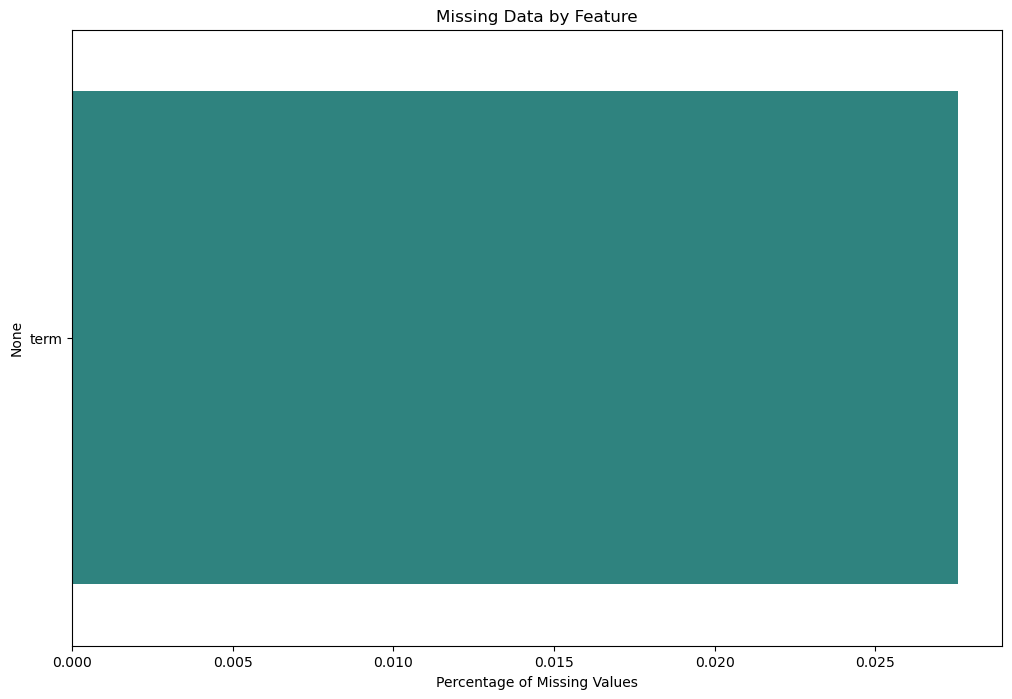

In [17]:
# Calculate missing value percentages
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()

# Plot missing values
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')
plt.xlabel("Percentage of Missing Values")
plt.title("Missing Data by Feature")
plt.show()


In [11]:
# Fill numerical NaNs
for col in ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'LTV', 'dtir1']:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical NaNs
for col in ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remaining NaNs check
print(df.isna().sum())

/tmp/ipykernel_14466/3165941389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_14466/3165941389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

ID                            0
year                          0
loan_limit                    0
Gender                        0
approv_in_adv                 0
loan_type                     0
loan_purpose                  0
Credit_Worthiness             0
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest              0
Interest_rate_spread          0
Upfront_charges               0
term                         41
Neg_ammortization             0
interest_only                 0
lump_sum_payment              0
property_value                0
construction_type             0
occupancy_type                0
Secured_by                    0
total_units                   0
income                        0
credit_type                   0
Credit_Score                  0
co-applicant_credit_type      0
age                           0
submission_of_application     0
LTV                           0
Region                        0
Security

**Univariate Analysis**


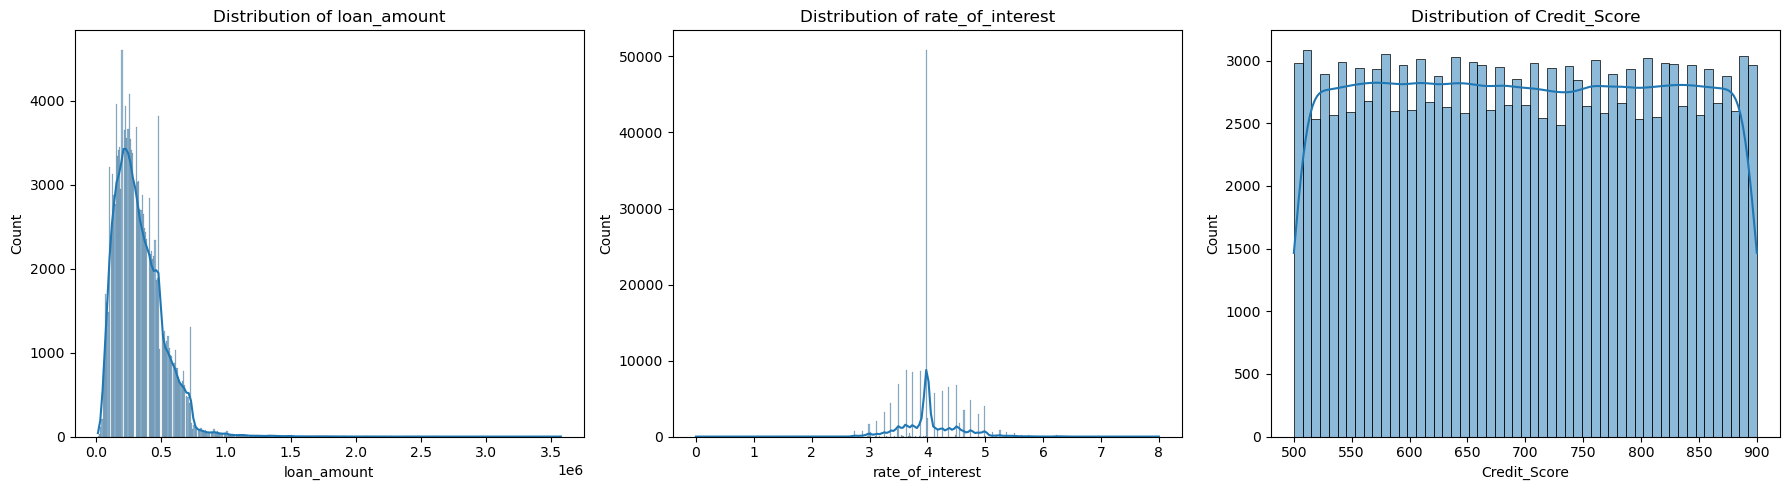

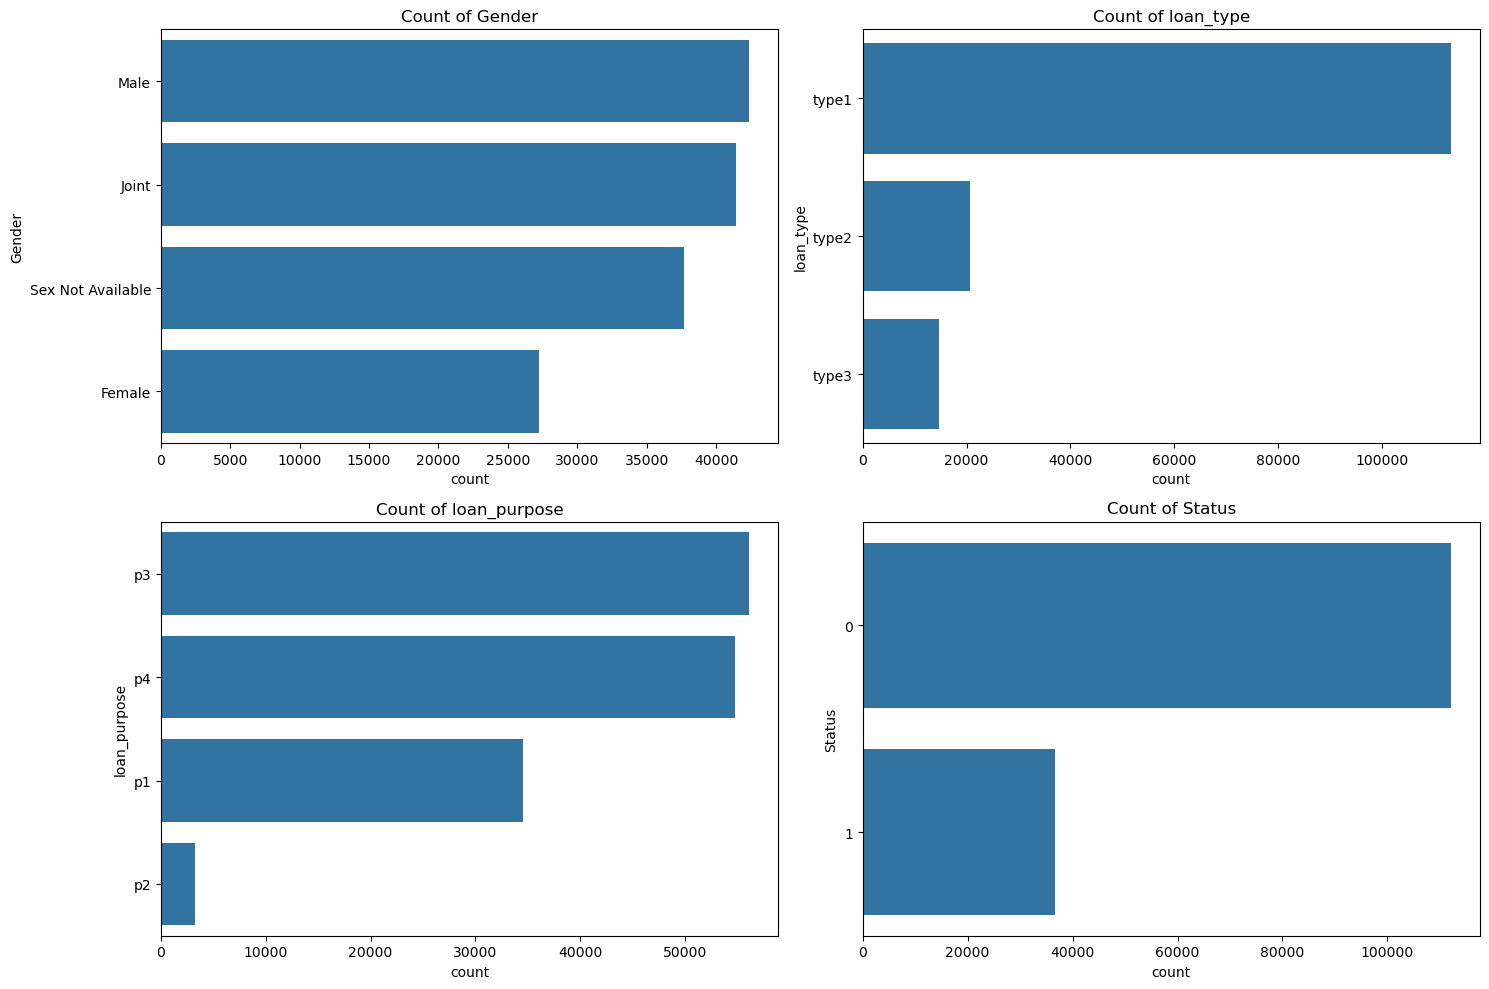

In [12]:
numerical_features = ['loan_amount', 'rate_of_interest', 'Credit_Score']
categorical_features = ['Gender', 'loan_type', 'loan_purpose', 'Status']

# Numerical
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
for ax, col in zip(axes, numerical_features):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Categorical
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for ax, col in zip(axes.flatten(), categorical_features):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Count of {col}')
plt.tight_layout()
plt.show()


### Analysis Conclusion

1. **Numerical Features**:
    - Histograms reveal distributions, patterns, and outliers for `loan_amount`, `rate_of_interest`, and `Credit_Score`.

2. **Categorical Features**:
    - Count plots show category frequencies for `Gender`, `loan_type`, `loan_purpose`, and `Status`.

3. **Missing Values**:
    - Columns like `rate_of_interest` and `Upfront_charges` had missing values that were imputed using median or mode.

4. **Data Quality**:
    - `df.info()` and `df.describe()` provided structural and statistical insights for data preparation.

The analysis highlights data structure, distributions, and quality issues, which were addressed for further processing.


**Bivariate Analysis**

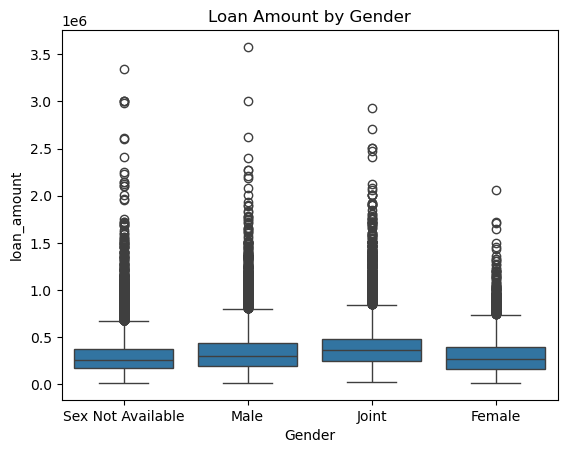

In [25]:
# Gender vs Loan Amount
sns.boxplot(x='Gender', y='loan_amount', data=df)
plt.title("Loan Amount by Gender")
plt.show()



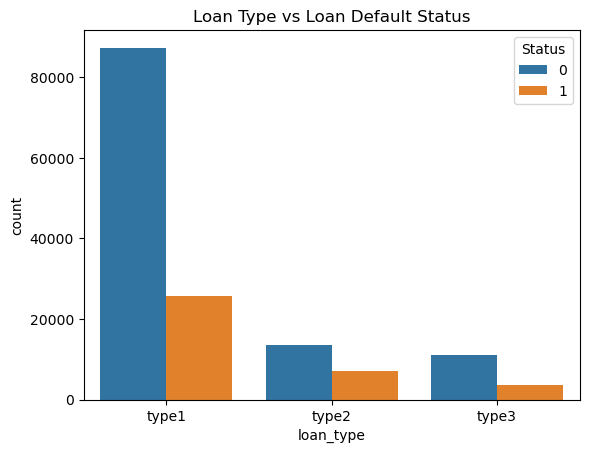

In [24]:

# Loan Type vs Status
sns.countplot(x='loan_type', hue='Status', data=df)
plt.title("Loan Type vs Loan Default Status")
plt.show()

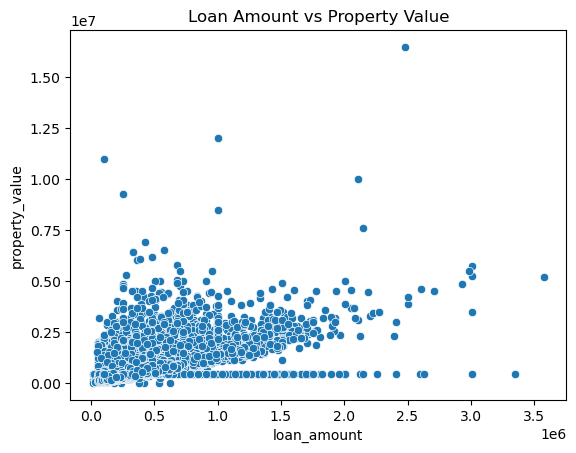

In [26]:
# Loan Amount vs Property Value
sns.scatterplot(x='loan_amount', y='property_value', data=df)
plt.title("Loan Amount vs Property Value")
plt.show()


- `region_loans`: Total loan amounts by region:
    - North: 24.7 billion (highest)
    - South: 21.3 billion
    - Central: 2.8 billion
    - North-East: 0.38 billion
- `yearly_defaults`: Average loan default rate in 2019 is 24.64%.
- `missing_percent`: `term` column has 0.027% missing values.


**Outlier Detection**

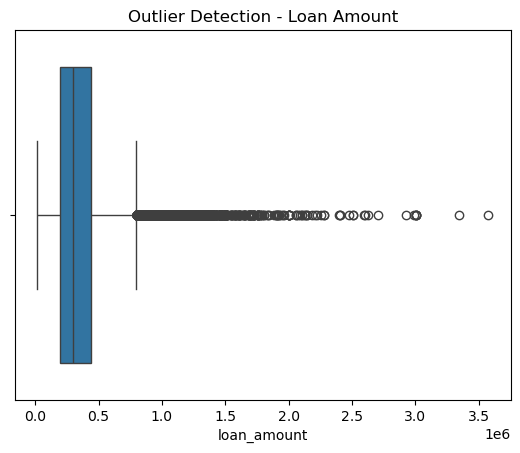

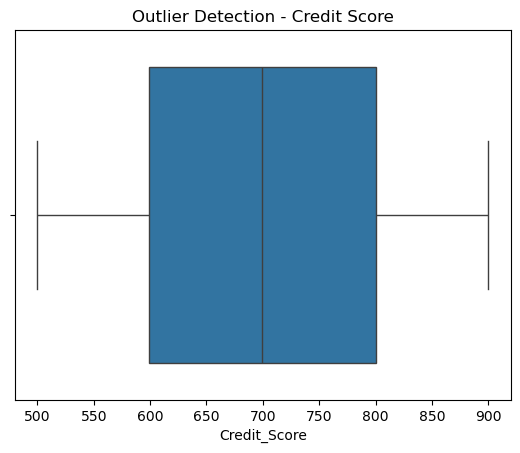

In [20]:
# Boxplots
sns.boxplot(x=df['loan_amount'])
plt.title("Outlier Detection - Loan Amount")
plt.show()

sns.boxplot(x=df['Credit_Score'])
plt.title("Outlier Detection - Credit Score")
plt.show()


**Trends**

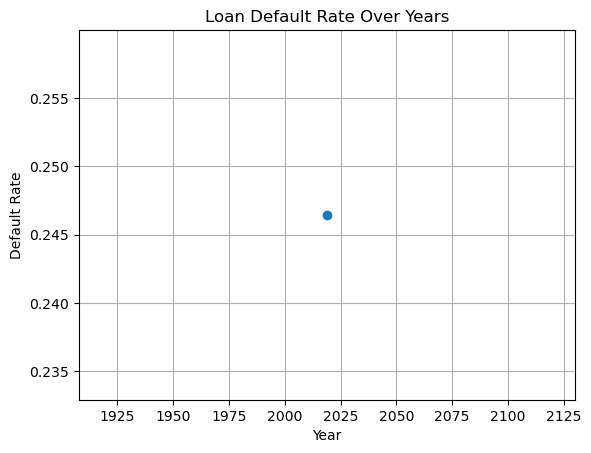

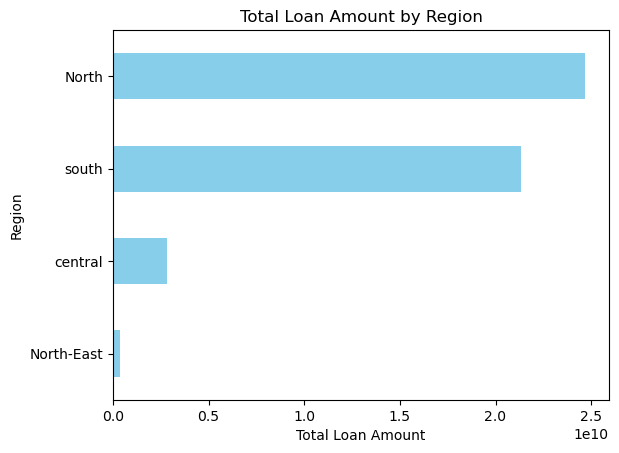

In [ ]:
# yearly Defaults
yearly_defaults = df.groupby('year')['Status'].mean()
yearly_defaults.plot(marker='o')
plt.title("Loan Default Rate Over Years")
plt.ylabel("Default Rate")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Region wise loans
region_loans = df.groupby('Region')['loan_amount'].sum().sort_values()
region_loans.plot(kind='barh', color='skyblue')
plt.title("Total Loan Amount by Region")
plt.xlabel("Total Loan Amount")
plt.show()


The trends discovered in the data analysis above include:

1. **Yearly Defaults**:
    - The `yearly_defaults` variable shows the average loan default rate for the year 2019, which is approximately 24.64%. This indicates the proportion of loans that defaulted in that year.

2. **Region-wise Total Loans**:
    - The `region_loans` variable highlights the total loan amounts distributed across different regions. For example:
      - The North region has the highest total loan amount (`24.7 billion`).
      - The South region follows with `21.3 billion`.
      - Central and North-East regions have significantly lower total loan amounts.

These trends provide insights into regional loan distribution and default rates, which can guide further analysis or decision-making.

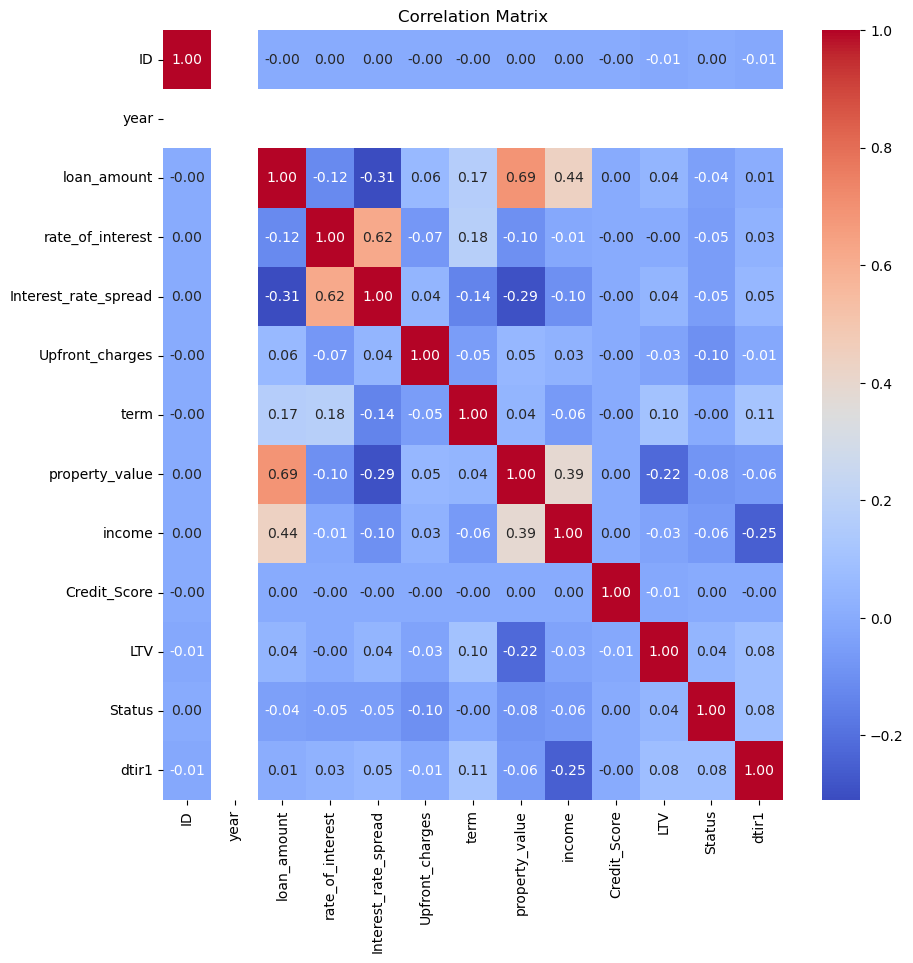

In [28]:
# Finding the correlation between numerical columns in the data
plt.figure(figsize=(10, 10))
correlation_matrix = df.corr(numeric_only=True).round(2)  # Ensure only numerical columns are used
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


To check for collinearity, we can analyze the correlation matrix. High correlation values (close to 1 or -1) between independent variables indicate potential collinearity. From the provided `correlation_matrix`, here are some observations:

1. **High Positive Correlations**:
    - `loan_amount` and `property_value` (0.69): Indicates a strong relationship between loan amount and property value.
    - `rate_of_interest` and `Interest_rate_spread` (0.62): Suggests these two variables are closely related.

2. **Moderate Correlations**:
    - `loan_amount` and `income` (0.44): Indicates a moderate relationship between loan amount and income.

3. **Low or Negligible Correlations**:
    - Most other variables have low or negligible correlations, indicating minimal collinearity.

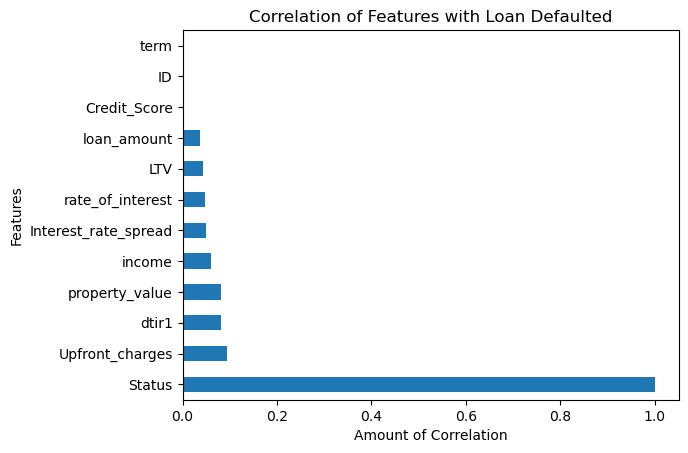

In [30]:
# Finding the correlation of all features with the target variable (Loan Defaulted).
s = df.corr(numeric_only=True)  # Ensure only numerical columns are used
s['Status'].abs().sort_values(ascending=False).head(12).plot(kind='barh')
plt.xlabel('Amount of Correlation')
plt.ylabel('Features')
plt.title('Correlation of Features with Loan Defaulted')
plt.show()